In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

In [2]:
X.shape, y.shape

((12330, 17), (12330, 1))

In [3]:
y['Revenue'].unique()

array([False,  True])

In [4]:
y.value_counts()

Revenue
False      10422
True        1908
Name: count, dtype: int64

In [5]:
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Nulls

X.isnull().mean() * 100

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
X.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

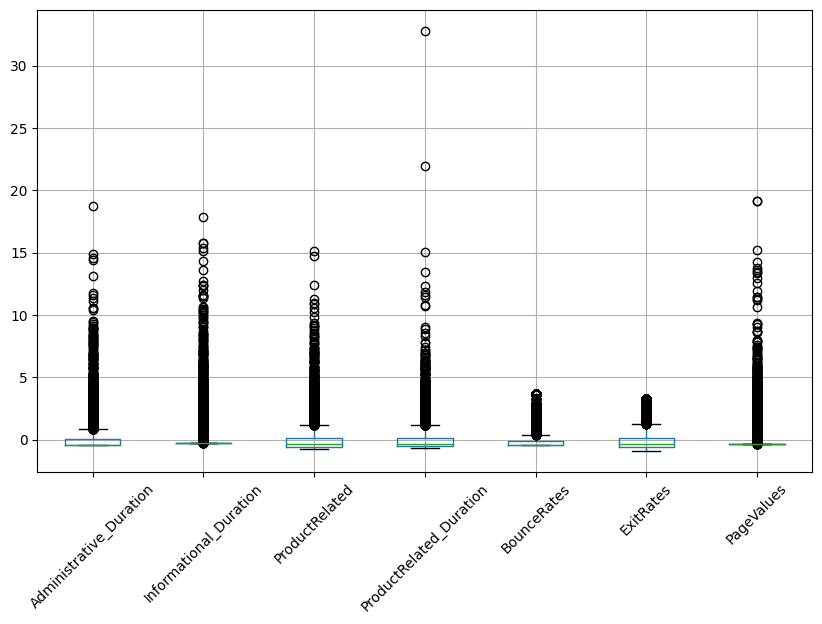

In [16]:

# Numeric columns
num_cols = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues"
           ]

# Outliers
#num_cols = X.select_dtypes(include=['number']).columns


# Standardizing
X_num = X[num_cols]
X_num = (X_num - X_num.mean())/X_num.std()
X_num.boxplot(figsize=(10,6))
plt.xticks(rotation=45)
plt.show()

In [18]:
outlier = {}

for col in num_cols:

    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q1 + (IQR * 1.5)

    X_filter = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outlier[col] = len(X_filter)*100/len(X)

outlier

{'Administrative_Duration': 17.704785077047852,
 'Informational_Duration': 19.505271695052716,
 'ProductRelated': 16.13949716139497,
 'ProductRelated_Duration': 15.993511759935117,
 'BounceRates': 18.48337388483374,
 'ExitRates': 15.92051905920519,
 'PageValues': 22.14111922141119}

In [23]:
## Random Forest Model

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

X_train.shape, X_val.shape, X_test.shape

((7859, 17), (1388, 17), (3083, 17))

In [63]:
cat_cols_1

['Month', 'VisitorType']

In [38]:
cat_cols_1 = X_train.select_dtypes(include=['object']).columns.tolist()
cat_cols_2 = [
    "Administrative",
    "Informational",
    "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend"
]
cat_cols = cat_cols_1 + cat_cols_2
num_cols = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues"
]

In [39]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

In [40]:
from sklearn.metrics import accuracy_score

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
rf_params = {
    'classifier__n_estimators': [5, 7, 9, 11, 13, 15],
    'classifier__max_depth': [5, 6, 7, 8, 9, 10]
}
rf = RandomForestClassifier()


xgb_params = {
    'classifier__n_estimators': [5, 7, 9, 11, 13, 15],
    'classifier__max_depth': [5, 6, 7, 8, 9, 10]
}
xgb = XGBClassifier(verbosity = 0, use_label_encoder=False)

best_score = 0.0
best_pipeline = None

for model, params in zip([rf, xgb], [rf_params, xgb_params]):

    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ]
    )

    grid = GridSearchCV(estimator=pipeline, param_grid=params, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train.values.reshape(-1,))

    y_val_predict = grid.predict(X_val)
    acc = accuracy_score(y_val_predict, 
                         y_val.values.reshape(-1,))

    
    
    print(grid.best_params_)
    print(grid.best_score_)
    print('Test Acc:', acc)

    if acc > best_score:
        best_pipeline = grid.best_estimator_

{'classifier__max_depth': 10, 'classifier__n_estimators': 11}
0.8462906723809246
Test Acc: 0.8342939481268011
{'classifier__max_depth': 5, 'classifier__n_estimators': 5}
0.8473090509764287
Test Acc: 0.8263688760806917


In [60]:
best_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Month', 'VisitorType',
                                                   'Administrative',
                                                   'Informational',
                                                   'SpecialDay', 'Month',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               co...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=5,
                               n_jobs=1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=0))])

In [62]:
y_test_predict = best_pipeline.predict(X_test)
accuracy_score(y_test_predict, y_test)

0.8449562114823224

----

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier

# Assuming you have already fetched and loaded the dataset into X and y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train)

# Define categorical and numerical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = [
    "Administrative_Duration", "Informational_Duration", "ProductRelated",
    "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"
]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# Define models and parameters
rf_params = {'classifier__n_estimators': [5, 7, 9, 11, 13, 15], 'classifier__max_depth': [5, 6, 7, 8, 9, 10]}
xgb_params = {'classifier__n_estimators': [5, 7, 9, 11, 13, 15], 'classifier__max_depth': [5, 6, 7, 8, 9, 10]}

models = [RandomForestClassifier(), XGBClassifier(verbosity=0, use_label_encoder=False)]
param_grids = [rf_params, xgb_params]

best_score = 0.0
best_pipeline = None

for model, params in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid = GridSearchCV(estimator=pipeline, param_grid=params, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_val_predict = grid.predict(X_val)
    acc = accuracy_score(y_val, y_val_predict)
    
    print(grid.best_params_)
    print(grid.best_score_)
    print('Validation Accuracy:', acc)
    
    if acc > best_score:
        best_pipeline = grid.best_estimator_

y_test_predict = best_pipeline.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_test_predict))


/Users/sreejithsreekumar/venvs/transformers/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/transformers/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/transformers/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/transformers/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionW

{'classifier__max_depth': 10, 'classifier__n_estimators': 15}
0.9067309358717077
Validation Accuracy: 0.9056195965417867
{'classifier__max_depth': 5, 'classifier__n_estimators': 5}
0.9073673111403735
Validation Accuracy: 0.9034582132564841
Test Accuracy: 0.8949075575737918
